## Import library

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

import warnings as wn
wn.filterwarnings(action='ignore')


## Data Import

In [2]:
df=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//employee//Employee-Attrition - Employee-Attrition.csv")
pd.set_option("display.max_columns", None)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## Data cleaning

In [3]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [6]:
print(df.duplicated().sum())

0


In [7]:
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [8]:
df.describe(include="all")

age attrition businesstravel    dailyrate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    department  distancefromhome    education educationfield  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        employeecount  employeenumber  environmentsatisfaction gender  \
count          1470.0     1470.000000              1470.000000   1470   
unique            NaN             NaN                      NaN      2   
top               NaN             NaN                      NaN   Male   
freq              NaN             NaN                      NaN    882   
mean              1.0     1024.865306                 2.721769    NaN   
std               0.0      602.024335                 1.093082    NaN   
min               1.0        1.000000                 1.000000    NaN   
25%               1.0      491.250000                 2.000000    NaN   
50%               1.0     1020.500000                 3.000000    NaN   
75%               1.0     1555.750000                 4.000000    NaN   
max               1.0     2068.000000                 4.000000    NaN   

         hourlyrate  jobinvolvement     joblevel          jobrole  \
count   1470.000000     1470.000000  1470.000000             1470   
unique          NaN             NaN          NaN                9   
top             NaN             NaN          NaN  Sales Executive   
freq            NaN             NaN          NaN              326   
mean      65.891156        2.729932     2.063946              NaN   
std       20.329428        0.711561     1.106940              NaN   
min       30.000000        1.000000     1.000000              NaN   
25%       48.000000        2.000000     1.000000              NaN   
50%       66.000000        3.000000     2.000000              NaN   
75%       83.750000        3.000000     3.000000              NaN   
max      100.000000        4.000000     5.000000              NaN   

        jobsatisfaction maritalstatus  monthlyincome   monthlyrate  \
count       1470.000000          1470    1470.000000   1470.000000   
unique              NaN             3            NaN           NaN   
top                 NaN       Married            NaN           NaN   
freq                NaN           673            NaN           NaN   
mean           2.728571           NaN    6502.931293  14313.103401   
std            1.102846           NaN    4707.956783   7117.786044   
min            1.000000           NaN    1009.000000   2094.000000   
25%            2.000000           NaN    2911.000000   8

In [9]:
assert pd.notnull(df).all().all()

In [10]:
assert pd.notnull(df.select_dtypes(include=["number"])).all().all()

In [11]:
df["over18"].value_counts()

over18
Y    1470
Name: count, dtype: int64

In [12]:
df["maritalstatus"].value_counts()

maritalstatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [13]:
df["employeecount"].value_counts()

employeecount
1    1470
Name: count, dtype: int64

In [14]:
df["standardhours"].value_counts()

standardhours
80    1470
Name: count, dtype: int64

In [15]:
df["employeenumber"].value_counts()

employeenumber
1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: count, Length: 1470, dtype: int64

In [15]:
df.drop(columns=["over18","employeecount","standardhours","employeenumber"], inplace=True)
df.head()

age attrition     businesstravel  dailyrate              department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   distancefromhome  education educationfield  environmentsatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   gender  hourlyrate  jobinvolvement  joblevel                jobrole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   jobsatisfaction maritalstatus  monthlyincome  monthlyrate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   numcompaniesworked overtime  percentsalaryhike  performancerating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   relationshipsatisfaction  stockoptionlevel  totalworkingyears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   trainingtimeslastyear  worklifebalance  yearsatcompany  yearsincurrentrole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   yearssincelastpromotion  yearswithcurrmanager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [16]:
df.shape

(1470, 31)

In [17]:
df["dailyrate"].nunique()

886

In [18]:
df["hourlyrate"].nunique()

71

## EDA

In [20]:
print(df["attrition"].value_counts())

attrition
No     1233
Yes     237
Name: count, dtype: int64


In [21]:
distribution = df['attrition'].value_counts(normalize=True) * 100
print(distribution)

attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Employees Attrition')

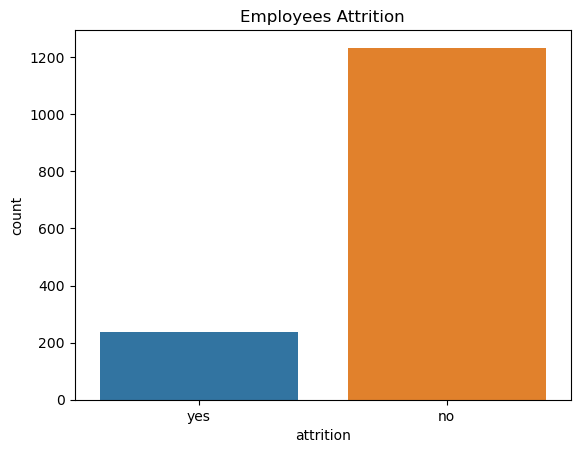

In [22]:
ax = sns.countplot(data=df, x="attrition")
ax.set_xticklabels(["yes", "no"])
plt.title("Employees Attrition")

### Univariate analysis

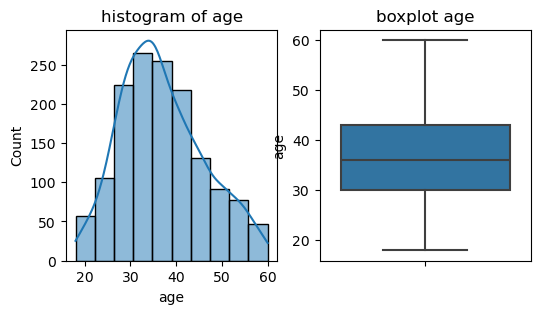

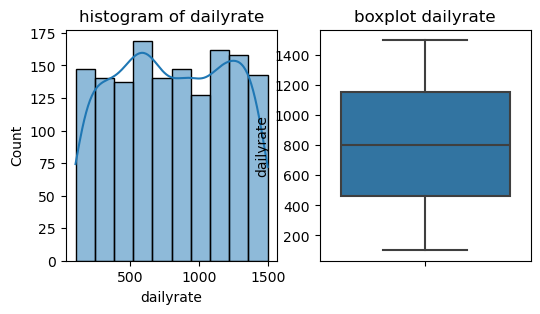

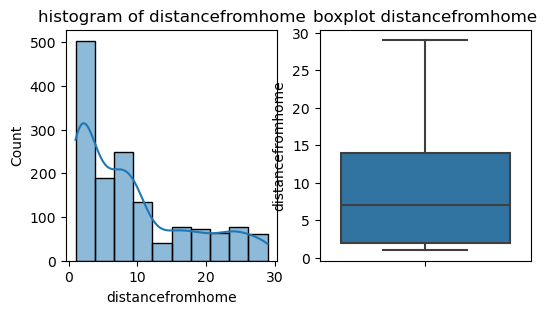

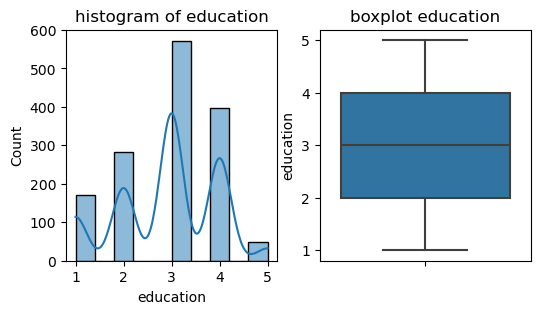

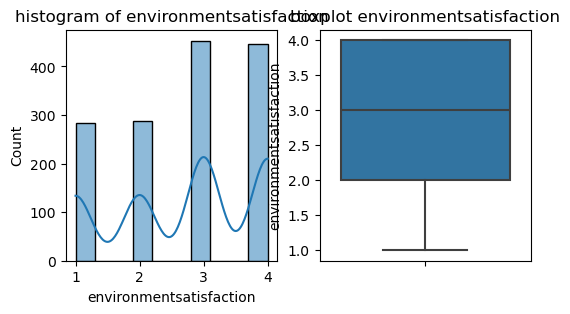

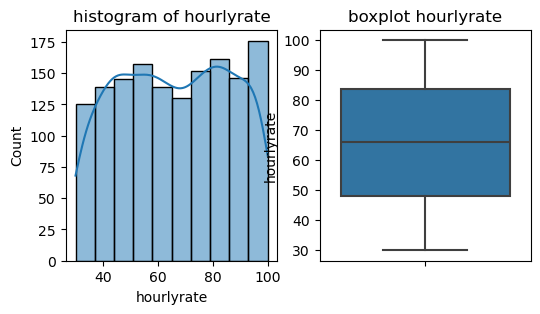

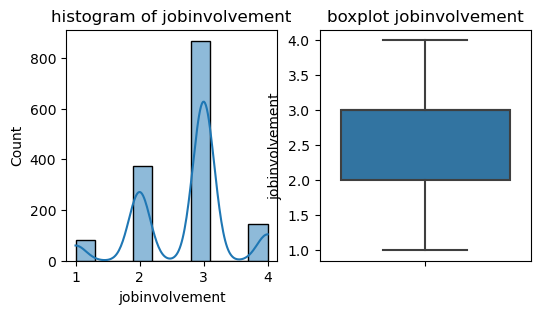

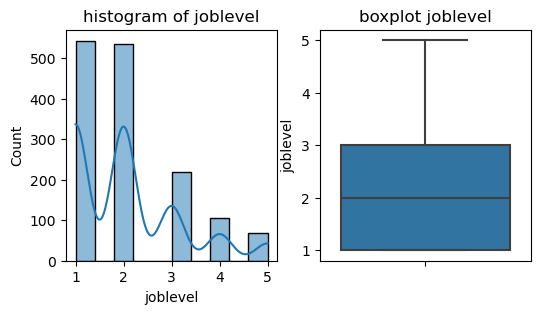

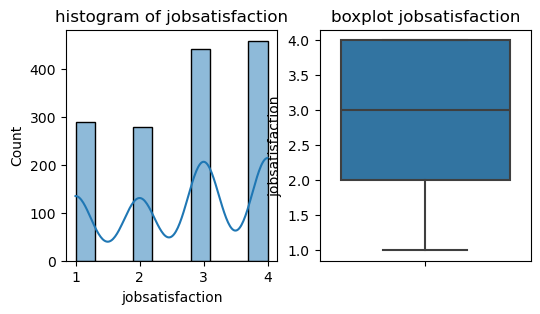

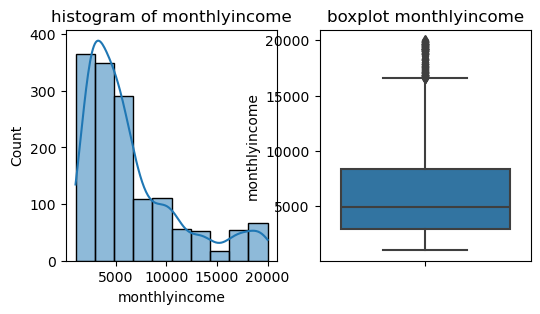

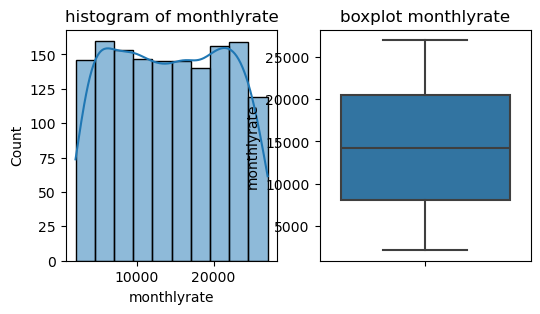

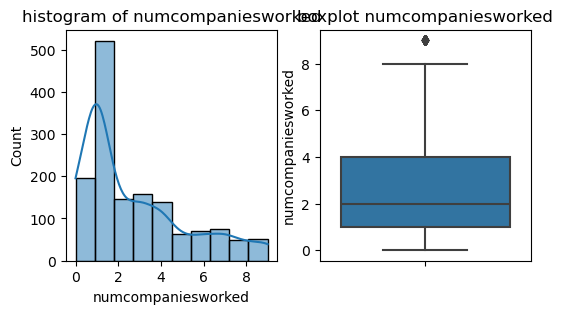

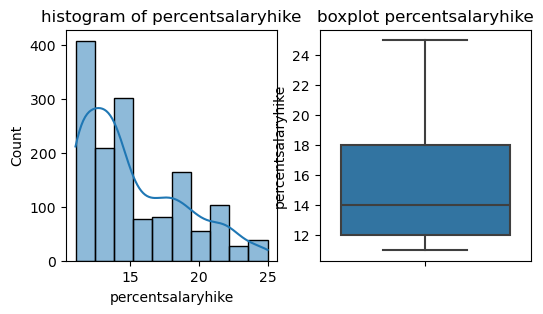

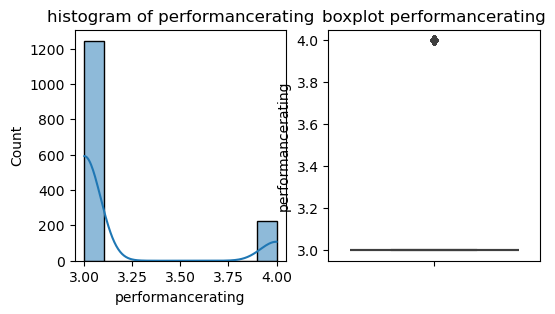

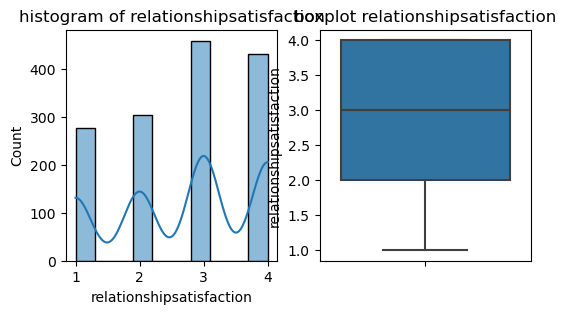

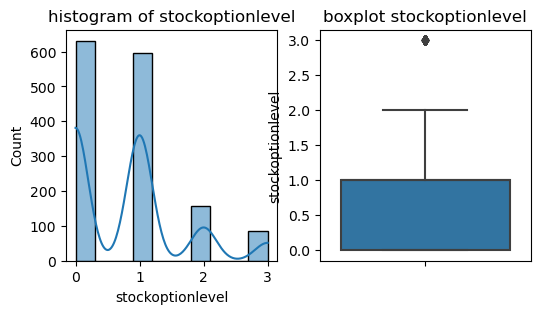

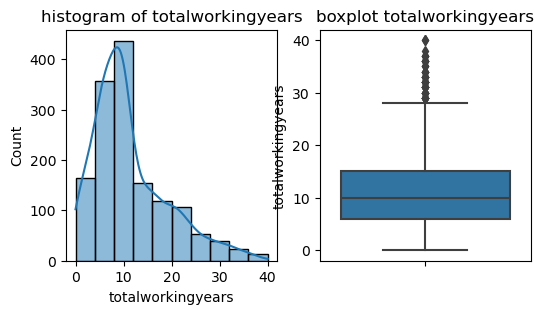

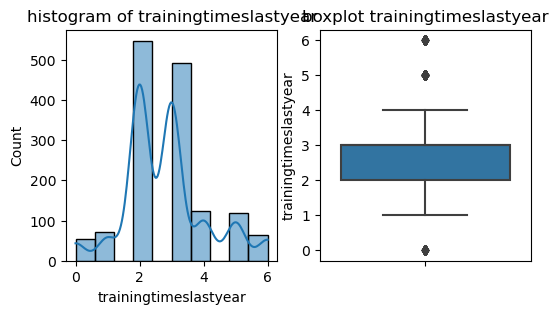

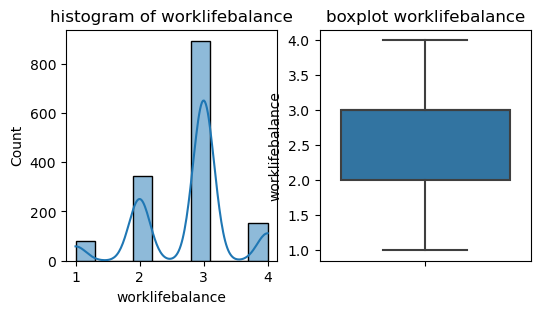

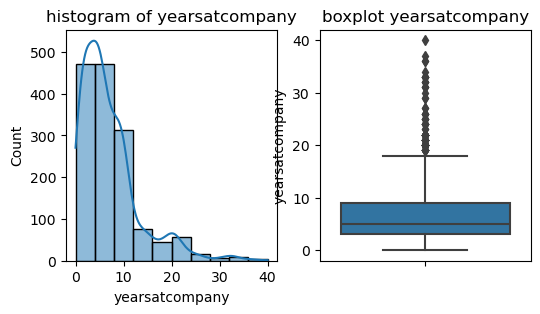

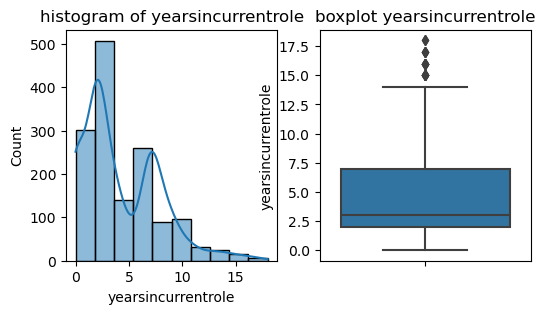

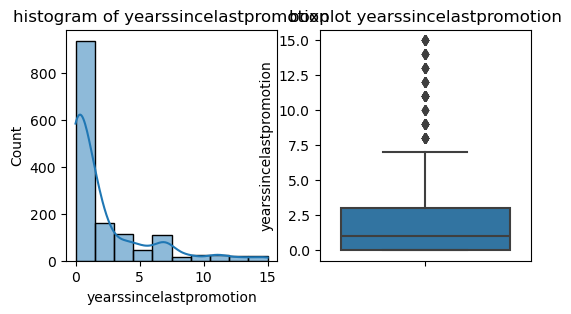

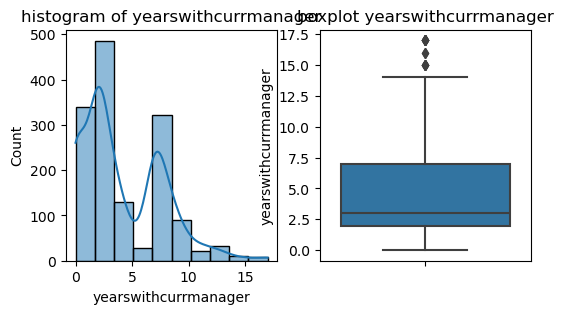

In [23]:
num_features=df.select_dtypes(include=["int64","float64"]).columns

for col in num_features:
    plt.figure(figsize=(6,3))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f"boxplot {col}")
    plt.show()

### Bivariate analysis

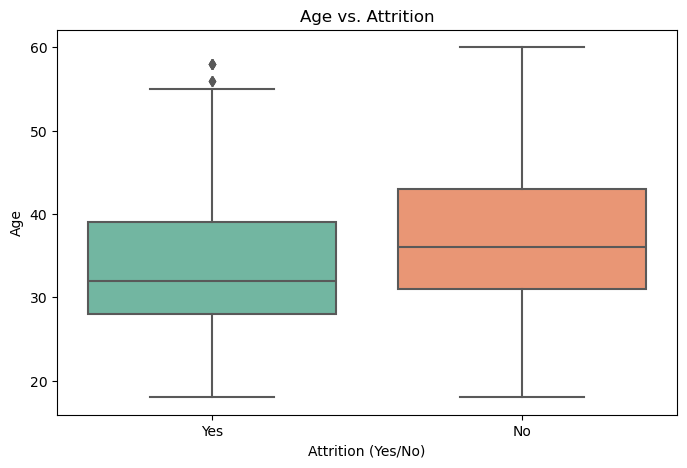

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='attrition', y='age', palette='Set2')
plt.title('Age vs. Attrition')
plt.xlabel('Attrition (Yes/No)')
plt.ylabel('Age')
plt.show()

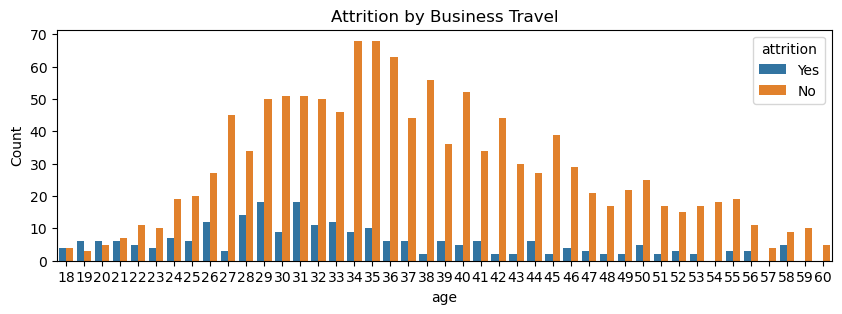

In [25]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='age', hue='attrition')
plt.title('Attrition by Business Travel')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

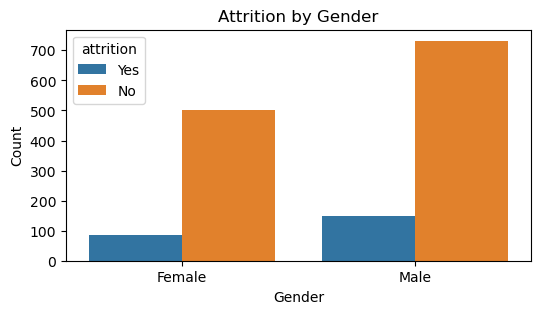

In [26]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='gender', hue='attrition')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

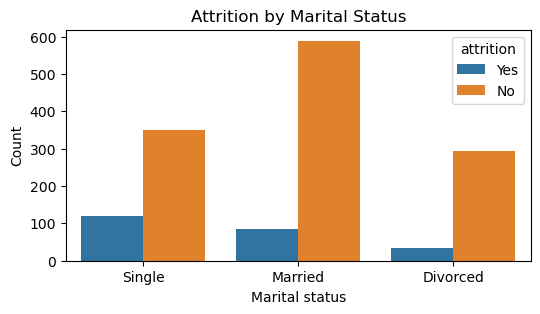

In [27]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='maritalstatus', hue='attrition')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()

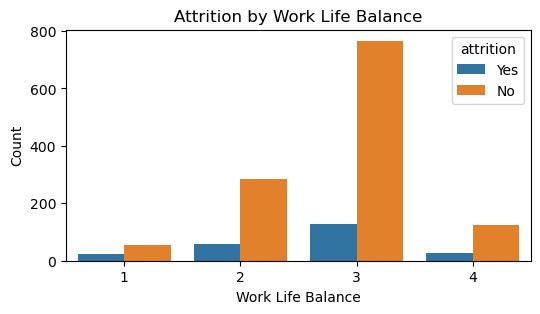

In [28]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='worklifebalance', hue='attrition')
plt.title('Attrition by Work Life Balance')
plt.xlabel('Work Life Balance')
plt.ylabel('Count')
plt.show()

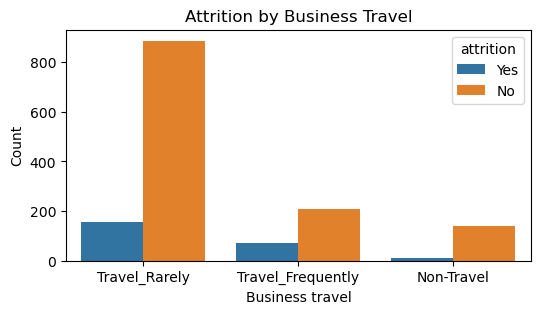

In [29]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='businesstravel', hue='attrition')
plt.title('Attrition by Business Travel')
plt.xlabel('Business travel')
plt.ylabel('Count')
plt.show()

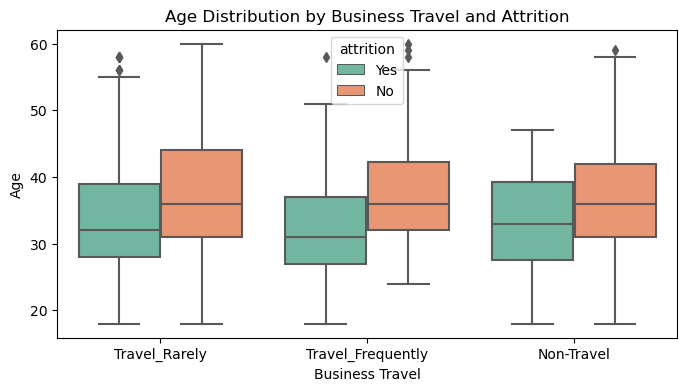

In [30]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='businesstravel', y='age', hue='attrition', palette='Set2')
plt.title('Age Distribution by Business Travel and Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Age')
plt.show()

Text(0.5, 1.0, 'Attrition by Daily rate')

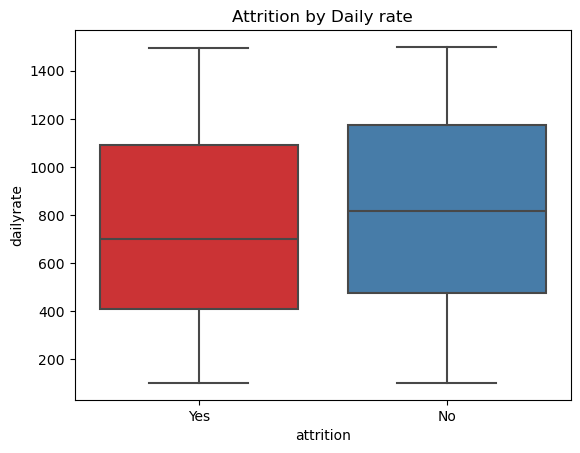

In [31]:
sns.boxplot(data=df, x='attrition', y='dailyrate', palette='Set1')
plt.title('Attrition by Daily rate')

Text(0.5, 1.0, 'Attrition by Hourly rate')

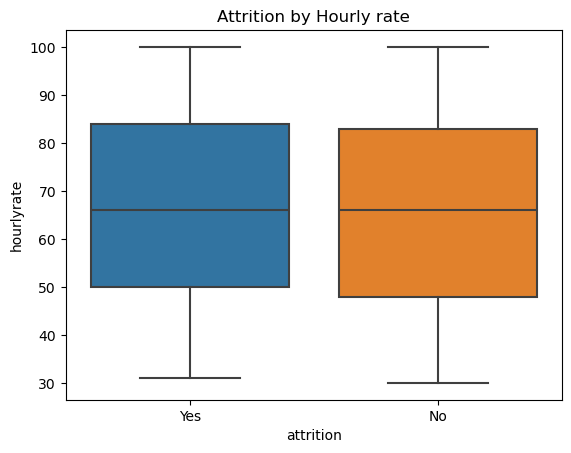

In [32]:
sns.boxplot(data=df, x='attrition', y='hourlyrate')
plt.title('Attrition by Hourly rate')

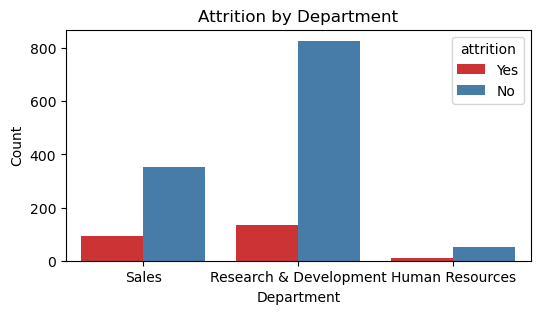

In [33]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='department', hue='attrition', palette='Set1')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

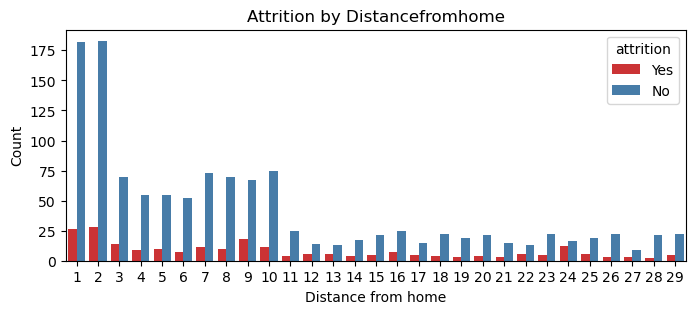

In [34]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='distancefromhome', hue='attrition', palette='Set1')
plt.title('Attrition by Distancefromhome')
plt.xlabel('Distance from home')
plt.ylabel('Count')
plt.show()

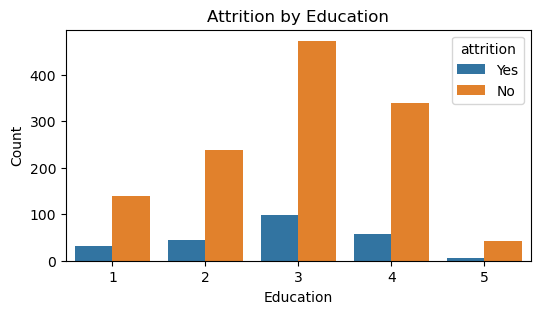

In [35]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='education', hue='attrition')
plt.title('Attrition by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

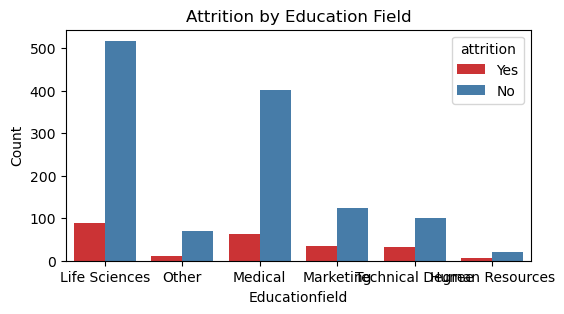

In [36]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='educationfield', hue='attrition', palette='Set1')
plt.title('Attrition by Education Field')
plt.xlabel('Educationfield')
plt.ylabel('Count')
plt.show()

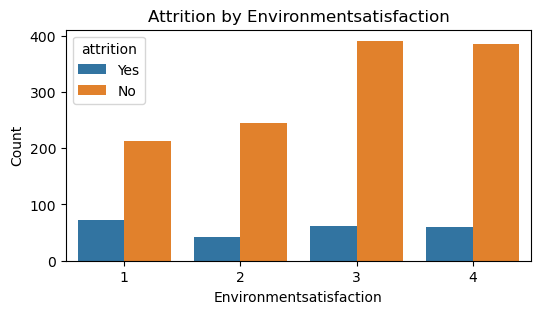

In [37]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='environmentsatisfaction', hue='attrition')
plt.title('Attrition by Environmentsatisfaction')
plt.xlabel('Environmentsatisfaction')
plt.ylabel('Count')
plt.show()

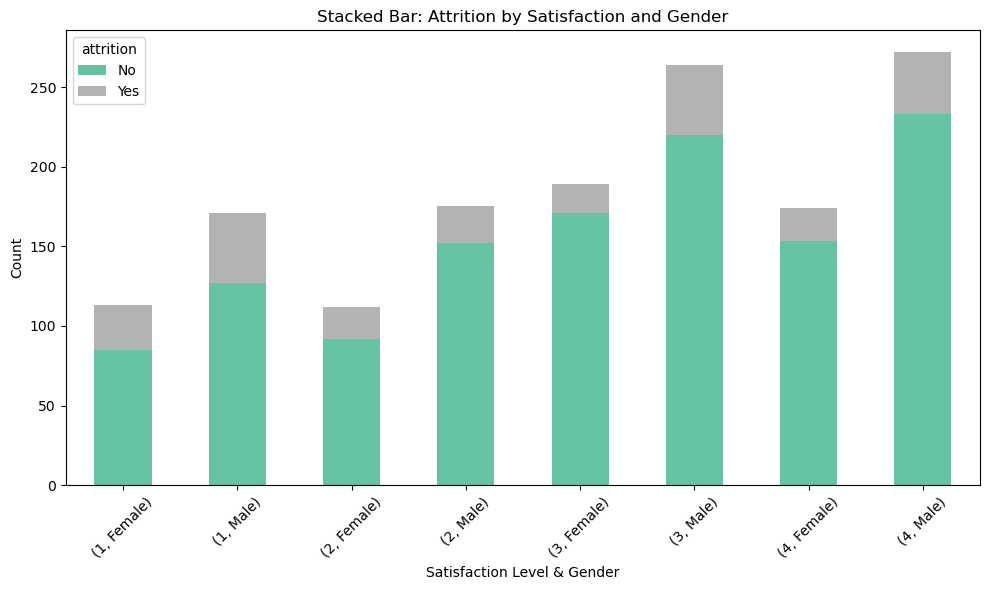

In [38]:
ct = pd.crosstab([df['environmentsatisfaction'], df['gender']], df['attrition'])

ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Stacked Bar: Attrition by Satisfaction and Gender")
plt.ylabel("Count")
plt.xlabel("Satisfaction Level & Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

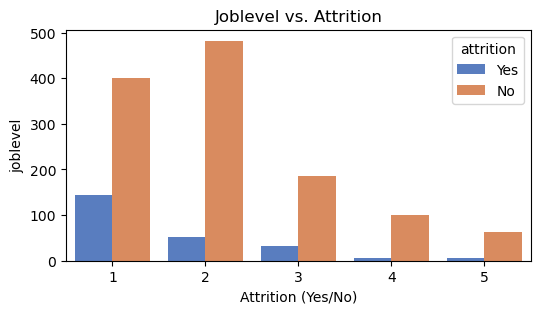

In [39]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='joblevel',hue='attrition' , palette='muted')
plt.title('Joblevel vs. Attrition')
plt.xlabel('Attrition (Yes/No)')
plt.ylabel('joblevel')
plt.show()


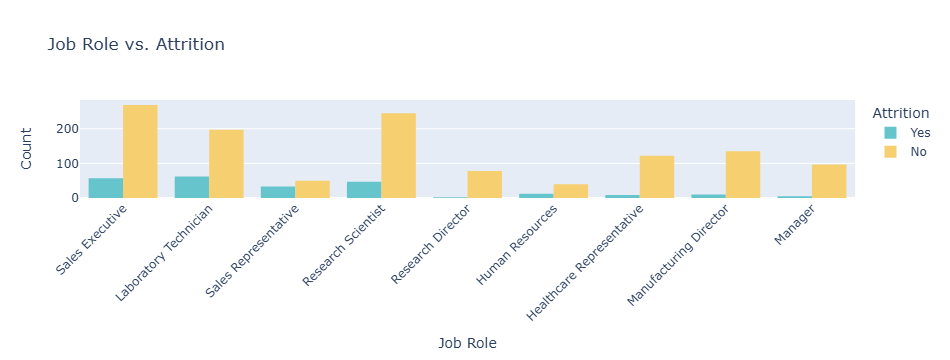

In [40]:
import plotly.express as px

fig = px.histogram(df, 
                   x='jobrole', 
                   color='attrition', 
                   barmode='group',
                   title='Job Role vs. Attrition',
                   labels={'jobrole': 'Job Role', 'attrition': 'Attrition'},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis_title='Job Role',
                  yaxis_title='Count',
                  xaxis_tickangle=-45,
                  bargap=0.2)

fig.show()


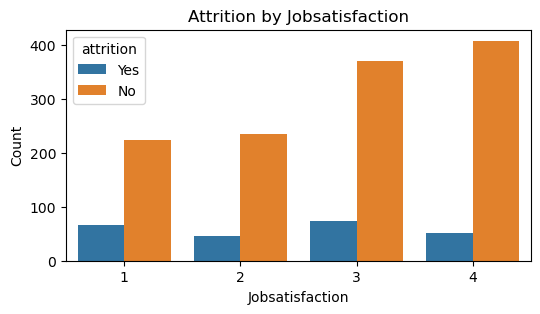

In [41]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='jobsatisfaction', hue='attrition')
plt.title('Attrition by Jobsatisfaction')
plt.xlabel('Jobsatisfaction')
plt.ylabel('Count')
plt.show()

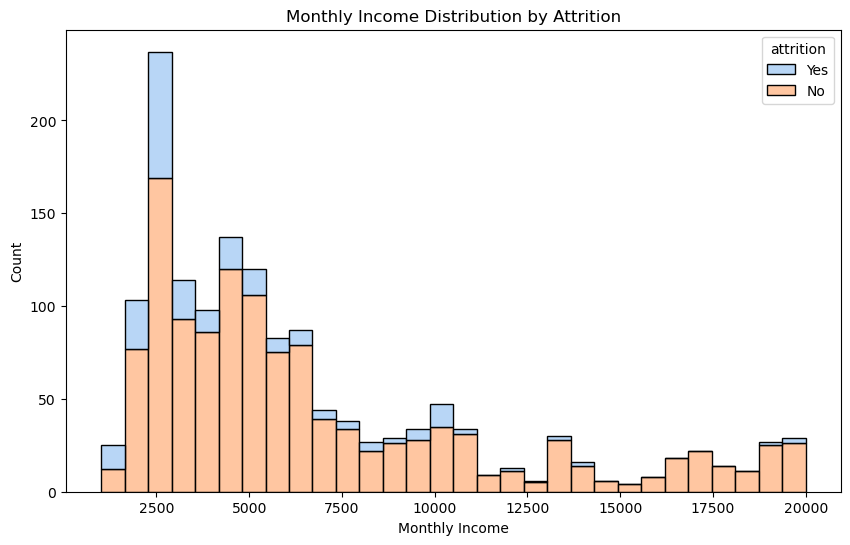

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='monthlyincome', hue='attrition', multiple='stack', bins=30, palette='pastel')
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

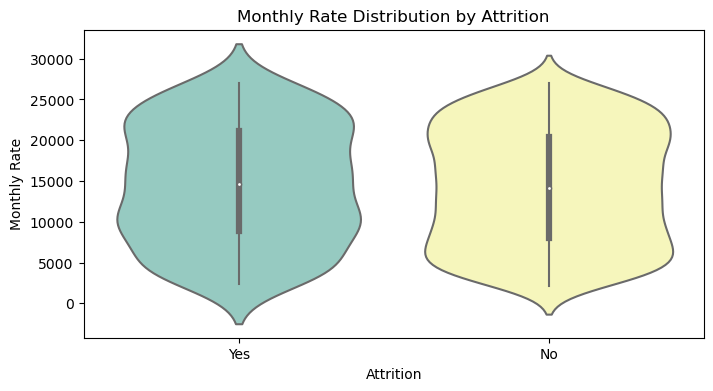

In [43]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='attrition', y='monthlyrate', palette='Set3')
plt.title('Monthly Rate Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Rate')
plt.show()

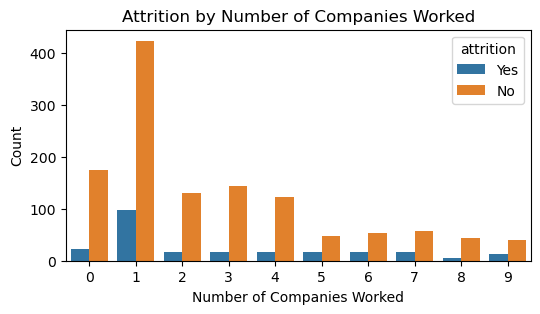

In [44]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='numcompaniesworked', hue='attrition')
plt.title('Attrition by Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.show()

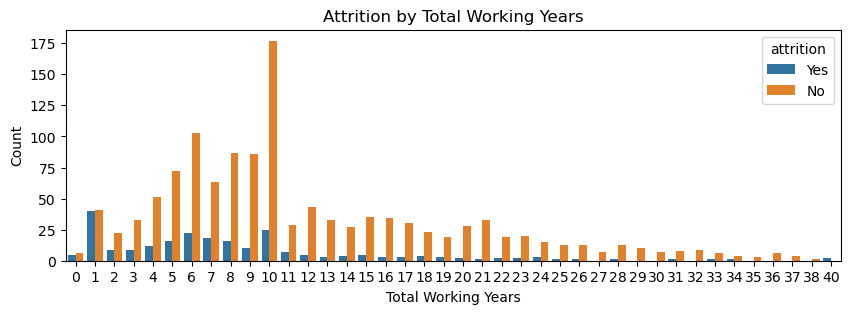

In [45]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='totalworkingyears', hue='attrition')
plt.title('Attrition by Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.show()

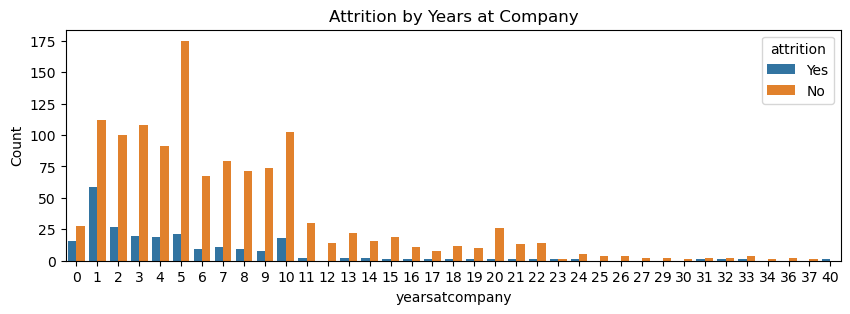

In [46]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='yearsatcompany', hue='attrition')
plt.title('Attrition by Years at Company')
plt.xlabel('yearsatcompany')
plt.ylabel('Count')
plt.show()

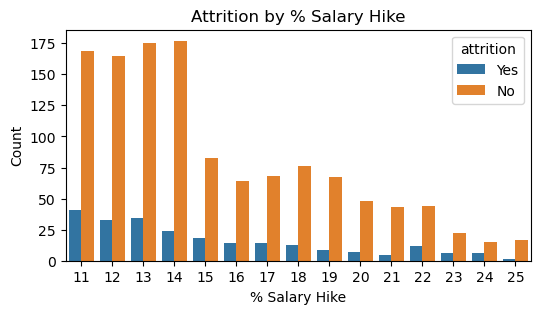

In [47]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='percentsalaryhike', hue='attrition')
plt.title('Attrition by % Salary Hike')
plt.xlabel('% Salary Hike')
plt.ylabel('Count')
plt.show()

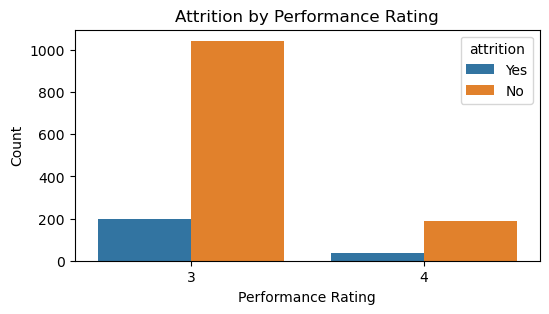

In [48]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='performancerating', hue='attrition')
plt.title('Attrition by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()

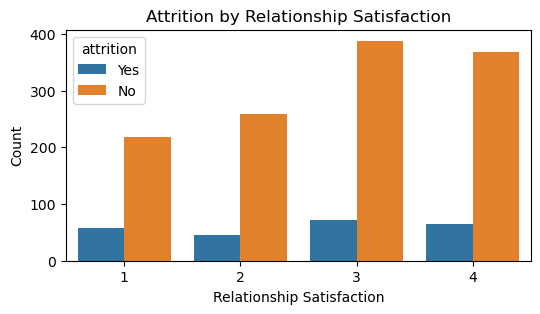

In [49]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='relationshipsatisfaction', hue='attrition')
plt.title('Attrition by Relationship Satisfaction')
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Count')
plt.show()

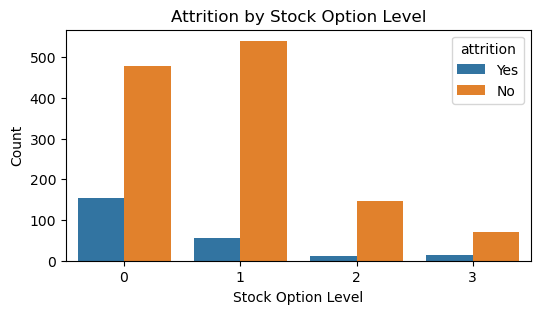

In [50]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='stockoptionlevel', hue='attrition')
plt.title('Attrition by Stock Option Level')
plt.xlabel('Stock Option Level')
plt.ylabel('Count')
plt.show()

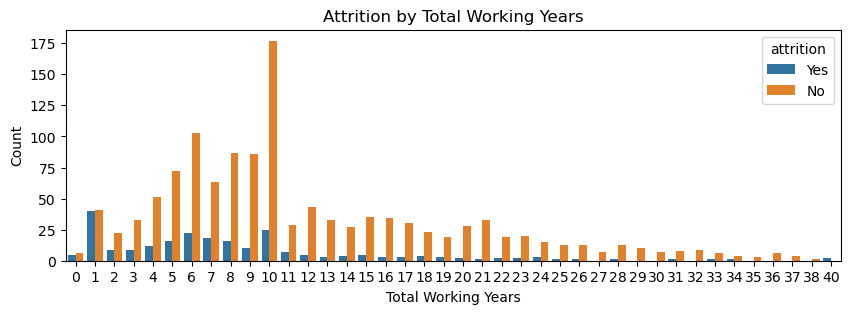

In [51]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='totalworkingyears', hue='attrition')
plt.title('Attrition by Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.show()

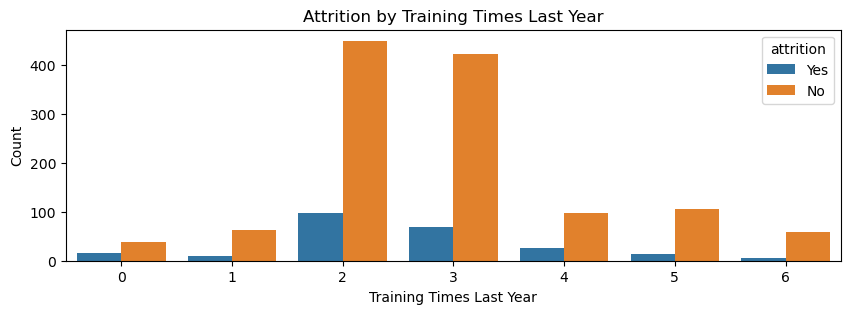

In [52]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='trainingtimeslastyear', hue='attrition')
plt.title('Attrition by Training Times Last Year')
plt.xlabel('Training Times Last Year')
plt.ylabel('Count')
plt.show()

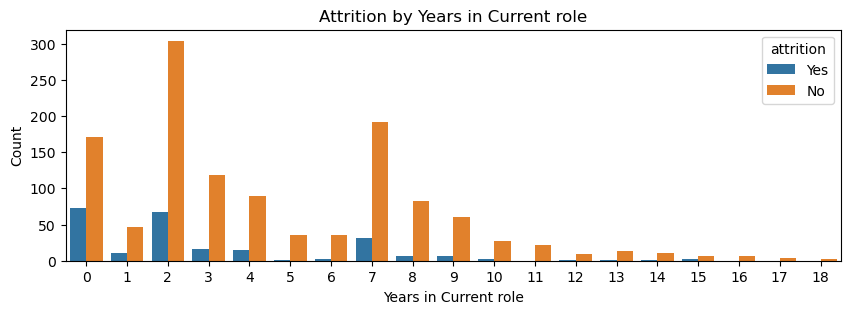

In [53]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='yearsincurrentrole', hue='attrition')
plt.title('Attrition by Years in Current role')
plt.xlabel('Years in Current role')
plt.ylabel('Count')
plt.show()

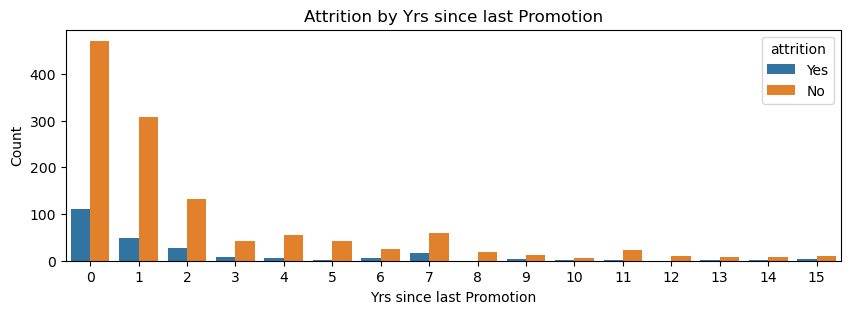

In [54]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='yearssincelastpromotion', hue='attrition')
plt.title('Attrition by Yrs since last Promotion')
plt.xlabel('Yrs since last Promotion')
plt.ylabel('Count')
plt.show()

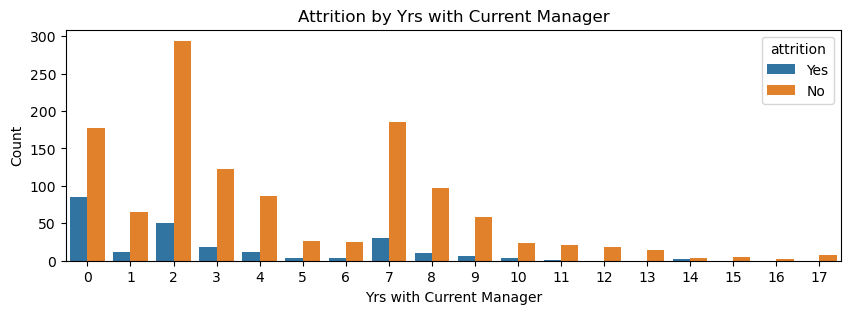

In [55]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='yearswithcurrmanager', hue='attrition')
plt.title('Attrition by Yrs with Current Manager')
plt.xlabel('Yrs with Current Manager')
plt.ylabel('Count')
plt.show()

## Outlayers

## Feature selection & Multivariate Analysis

In [56]:
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
df[numerical_cols].corr()

age  dailyrate  distancefromhome  education  \
age                       1.000000   0.010661         -0.001686   0.208034   
dailyrate                 0.010661   1.000000         -0.004985  -0.016806   
distancefromhome         -0.001686  -0.004985          1.000000   0.021042   
education                 0.208034  -0.016806          0.021042   1.000000   
environmentsatisfaction   0.010146   0.018355         -0.016075  -0.027128   
hourlyrate                0.024287   0.023381          0.031131   0.016775   
jobinvolvement            0.029820   0.046135          0.008783   0.042438   
joblevel                  0.509604   0.002966          0.005303   0.101589   
jobsatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
monthlyincome             0.497855   0.007707         -0.017014   0.094961   
monthlyrate               0.028051  -0.032182          0.027473  -0.026084   
numcompaniesworked        0.299635   0.038153         -0.029251   0.126317   
percentsalaryhike         0.003634   0.022704          0.040235  -0.011111   
performancerating         0.001904   0.000473          0.027110  -0.024539   
relationshipsatisfaction  0.053535   0.007846          0.006557  -0.009118   
stockoptionlevel          0.037510   0.042143          0.044872   0.018422   
totalworkingyears         0.680381   0.014515          0.004628   0.148280   
trainingtimeslastyear    -0.019621   0.002453         -0.036942  -0.025100   
worklifebalance          -0.021490  -0.037848         -0.026556   0.009819   
yearsatcompany            0.311309  -0.034055          0.009508   0.069114   
yearsincurrentrole        0.212901   0.009932          0.018845   0.060236   
yearssincelastpromotion   0.216513  -0.033229          0.010029   0.054254   
yearswithcurrmanager      0.202089  -0.026363          0.014406   0.069065   

                          environmentsatisfaction  hourlyrate  jobinvolvement  \
age                                      0.010146    0.024287        0.029820   
dailyrate                                0.018355    0.023381        0.046135   
distancefromhome                        -0.016075    0.031131        0.008783   
education                               -0.027128    0.016775        0.042438   
environmentsatisfaction                  1.000000   -0.049857       -0.008278   
hourlyrate                              -0.049857    1.000000        0.042861   
jobinvolvement                          -0.008278    0.042861        1.000000   
joblevel                                 0.001212   -0.027853       -0.012630   
jobsatisfaction                         -0.006784   -0.071335       -0.021476   
monthlyincome                           -0.006259   -0.015794       -0.015271   
monthlyrate                              0.037600   -0.015297       -0.016322   
numcompaniesworked                       0.012594    0.022157        0.015012   
percentsalaryhike                       -0.031701   -0.009062       -0.017205   
performancerating                       -0.029548   -0.002172       -0.029071   
relationshipsatisfaction                 0.007665    0.001330        0.034297   
stockoptionlevel                         0.003432    0.050263        0.021523   
totalworkingyears                       -0.002693   -0.002334       -0.005533   
trainingtimeslastyear                   -0.019359   -0.008548       -0.015338   
worklifebalance                          0.027627   -0.004607       -0.014617   
yearsatcompany                           0.001458   -0.019582       -0.021355   
yearsincurrentrole                       0.018007   -0.024106        0.008717   
yearssincelastpromotion                  0.016194   -0.026716       -0.024184   
yearswithcurrmanager                    -0.004999   -0.020123        0.025976   

                          joblevel  jobsatisfaction  monthlyincome  \
age                       0.509604        -0.004892       0.497855   
dailyrate                 0.002966         0.030571       0.007707   
dis

<Axes: >

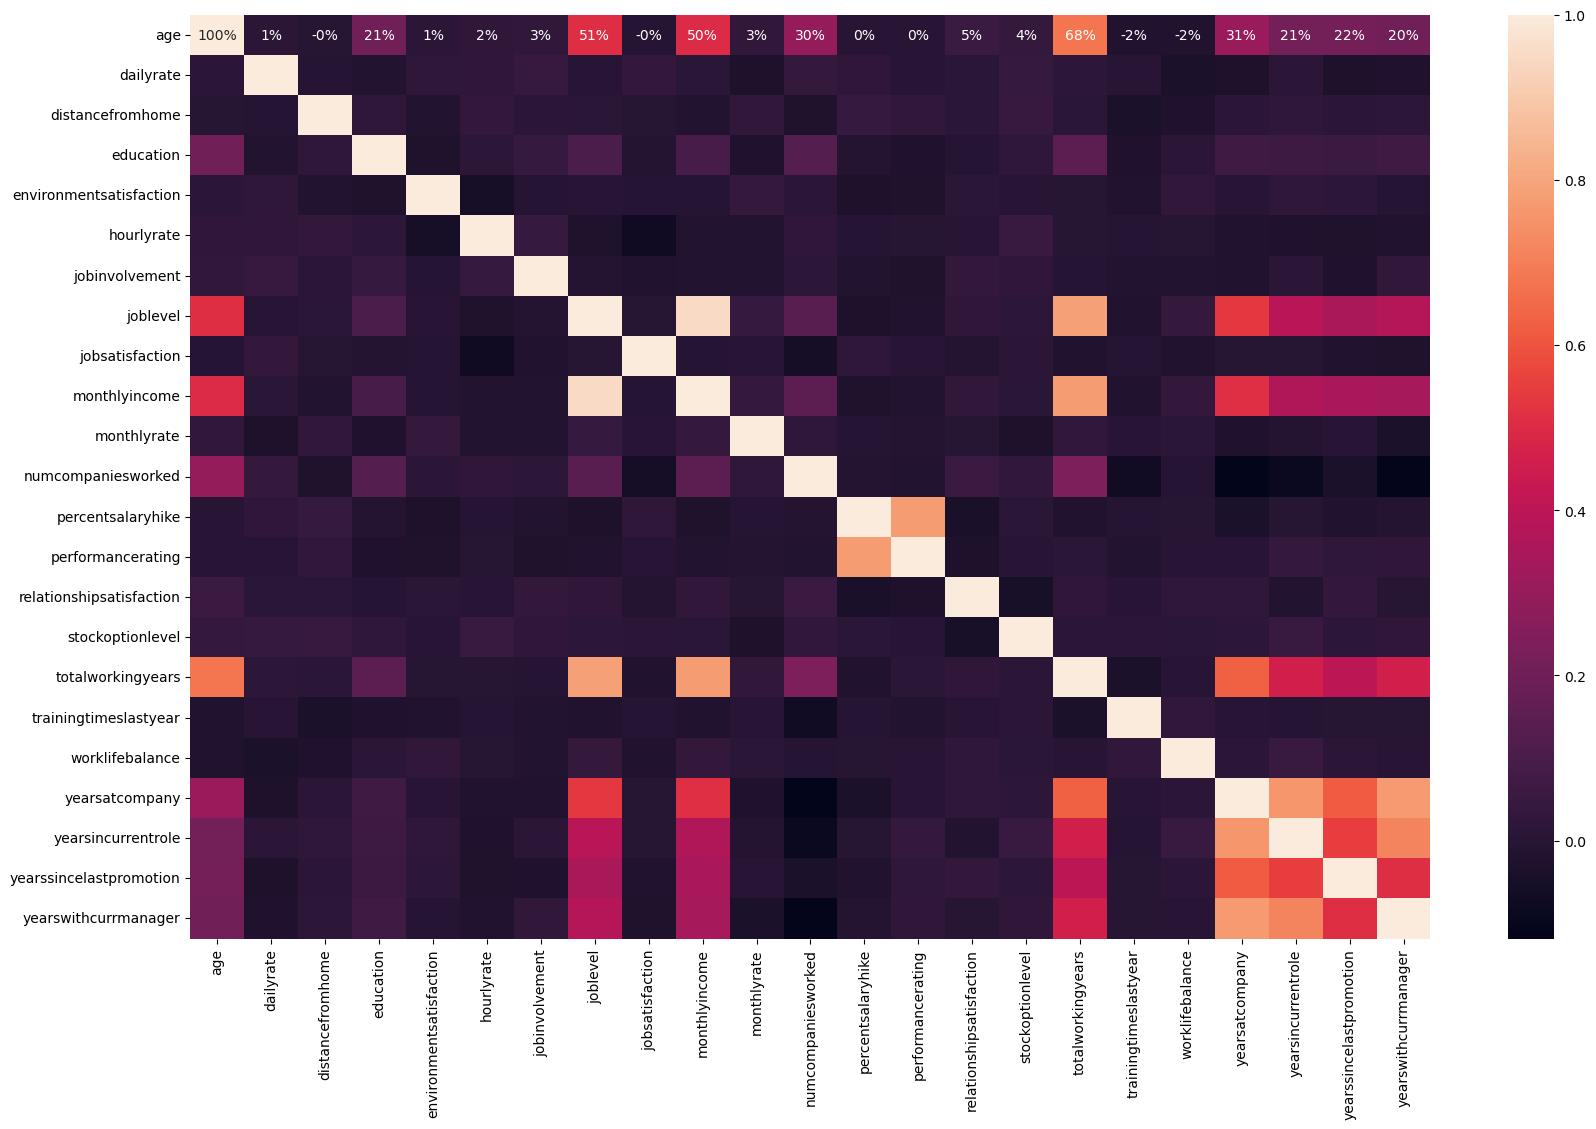

In [57]:
plt.figure(figsize=(20,12))
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.0%')

In [ ]:
# monthlyincome & joblevel (0.950300) so drop since multicollinearity


## Encoding 

### Binary encoding

In [58]:
df["attrition"]=df["attrition"].map({"Yes":1, "No":0})

In [59]:
distribution = df['attrition'].value_counts(normalize=True) * 100
print(distribution)

attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [60]:
df["overtime"]=df["overtime"].map({"Yes":1, "No":0})

### One hand encoding 

In [61]:
categorical_cols = ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)
df.head()

age  attrition  dailyrate  distancefromhome  education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   environmentsatisfaction  hourlyrate  jobinvolvement  joblevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   jobsatisfaction  monthlyincome  monthlyrate  numcompaniesworked  overtime  \
0                4           5993        19479                   8         1   
1                2           5130        24907                   1         0   
2                3           2090         2396                   6         1   
3                3           2909        23159                   1         1   
4                2           3468        16632                   9         0   

   percentsalaryhike  performancerating  relationshipsatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   worklifebalance  yearsatcompany  yearsincurrentrole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   yearssincelastpromotion  yearswithcurrmanager  \
0                        0                     5   
1                        1                     7   
2                        0                     0   
3                        3                     0   
4                        2                     2   

   businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   department_Research & Development  department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   educationfield_Life Sciences  educationfield_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   educationfield_Medical  educationfield_Other  \
0                       0                     0   
1                       0                    

In [62]:
df.tail()

age  attrition  dailyrate  distancefromhome  education  \
1465   36          0        884                23          2   
1466   39          0        613                 6          1   
1467   27          0        155                 4          3   
1468   49          0       1023                 2          3   
1469   34          0        628                 8          3   

      environmentsatisfaction  hourlyrate  jobinvolvement  joblevel  \
1465                        3          41               4         2   
1466                        4          42               2         3   
1467                        2          87               4         2   
1468                        4          63               2         2   
1469                        2          82               4         2   

      jobsatisfaction  monthlyincome  monthlyrate  numcompaniesworked  \
1465                4           2571        12290                   4   
1466                1           9991        21457                   4   
1467                2           6142         5174                   1   
1468                2           5390        13243                   2   
1469                3           4404        10228                   2   

      overtime  percentsalaryhike  performancerating  \
1465         0                 17                  3   
1466         0                 15                  3   
1467         1                 20                  4   
1468         0                 14                  3   
1469         0                 12                  3   

      relationshipsatisfaction  stockoptionlevel  totalworkingyears  \
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

      trainingtimeslastyear  worklifebalance  yearsatcompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      yearsincurrentrole  yearssincelastpromotion  yearswithcurrmanager  \
1465                   2                        0                     3   
1466                   7                        1                     7   
1467                   2                        0                     3   
1468                   6                        0                     8   
1469                   3                        1                     2   

      businesstravel_Travel_Frequently  businesstravel_Travel_Rarely  \
1465                                 1                             0   
1466                                 0                             1   
1467                                 0                             1   
1468                                 1                             0   
1469                                 0                             1   

      department_Research & Development  department_Sales  \
1465                                  1                 0   
1466                                  1                 0   
1467                                  1                 0   
1468                                  0                 1   
1469                                  1                 0   

      educationfield_Life Sciences  educationfield_Marketing  \
1465                             0                         0   
1466                             0                         0   
1467                             1                         0   
1468                             0                         0   
1469                             0 

## Train Test Split 

In [63]:
x = df.drop(columns=["attrition"])
y = df["attrition"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Smote

In [64]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

## Feature Scaling

In [65]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (1706, 44), y_train shape: (1706,)
x_test shape: (441, 44), y_test shape: (441,)


## Best Model Selection

### Logistic Regression

In [67]:
log = LogisticRegression(C= 0.1, penalty= 'l1', solver= 'liblinear')  

# Train the model
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print('Logitic Regression')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = log.score(x_train, y_train)
test_acc = log.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = log.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Logitic Regression
Accuracy: 0.88
Train Accuracy: 0.8992
Test Accuracy: 0.8821

Confusion Matrix:
 [[359  21]
 [ 31  30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       380
           1       0.59      0.49      0.54        61

    accuracy                           0.88       441
   macro avg       0.75      0.72      0.73       441
weighted avg       0.87      0.88      0.88       441

AUC Score: 0.7992
Balanced Accuracy: 0.7183


In [68]:
cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.86394558 0.84353741 0.85714286 0.8707483  0.8707483  0.8707483
 0.87755102 0.86394558 0.86394558 0.88435374]
Mean CV Accuracy: 0.8666666666666666


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'lbfgs'],  
    'penalty': ['l1', 'l2'],  
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


### Decision Tree Classifier

In [70]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 2)
#max_depth=3

# Train the model
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

print('Decision Tree Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = dt.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Decision Tree Classifier
Accuracy: 0.77
Train Accuracy: 0.9924
Test Accuracy: 0.7710
Confusion Matrix:
 [[320  60]
 [ 41  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       380
           1       0.25      0.33      0.28        61

    accuracy                           0.77       441
   macro avg       0.57      0.58      0.57       441
weighted avg       0.80      0.77      0.78       441

AUC Score: 0.5852
Balanced Accuracy: 0.5850


In [71]:
cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.86394558 0.84353741 0.85714286 0.8707483  0.8707483  0.8707483
 0.87755102 0.86394558 0.86394558 0.88435374]
Mean CV Accuracy: 0.8666666666666666


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [5, 10, 15, 20, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5, 10] 
}
# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search_dt.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search_dt.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random Forest Classifier

In [73]:
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= 20, min_samples_leaf= 1, 
                            min_samples_split= 2, n_estimators= 100)
# max_depth=3, n_estimators=20, random_state=42
# bootstrap= False, criterion= 'entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100

# Train the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)


print('Random Forest Classifier')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = rf.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Random Forest Classifier
Accuracy: 0.86
Train Score: 1.0000
Test Score: 0.8594
Confusion Matrix:
 [[362  18]
 [ 44  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       380
           1       0.49      0.28      0.35        61

    accuracy                           0.86       441
   macro avg       0.69      0.62      0.64       441
weighted avg       0.84      0.86      0.84       441

AUC-ROC Score: 0.7156
Balanced Accuracy: 0.6157


In [74]:
cv_scores = cross_val_score(dt, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.78231293 0.82312925 0.78911565 0.7755102  0.78911565 0.79591837
 0.73469388 0.81632653 0.80272109 0.78911565]
Mean CV Accuracy: 0.789795918367347


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200], 
    'criterion': ['gini', 'entropy'], 
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'bootstrap': [True, False]  
}
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV on training data
grid_search_rf.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search_rf.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### SVC (Support Vector Classifier)

In [89]:
svc= SVC(C= 1, gamma= 'scale', kernel= 'rbf',probability=True)  
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)


print('Support Vector Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
train_acc = svc.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC-AUC score
y_probs = svc.predict_proba(x_test)[:, 1] 
roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Support Vector Classifier
Accuracy: 0.88
Train Score: 0.9578
Test Score: 0.8844
Confusion Matrix:
 [[372   8]
 [ 43  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.69      0.30      0.41        61

    accuracy                           0.88       441
   macro avg       0.79      0.64      0.67       441
weighted avg       0.87      0.88      0.86       441

AUC Score: 0.7970
Balanced Accuracy: 0.6370


In [77]:
cv_scores = cross_val_score(dt, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.78231293 0.82312925 0.78911565 0.7755102  0.78911565 0.79591837
 0.73469388 0.81632653 0.80272109 0.78911565]
Mean CV Accuracy: 0.789795918367347


In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'gamma': ['scale', 'auto'], 
}
# Initialize SVC model
svc = SVC(random_state=42)

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV on training data
grid_search_svc.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search_svc.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


### XGBoost

In [79]:
import xgboost as xgb

xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8)

# learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8
# objective='binary:logistic', eval_metric='logloss', use_label_encoder=False,random_state=42

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('XGBoost Classifier')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = xgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC score
y_probs = xgb.predict_proba(x_test)[:, 1] 
roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

XGBoost Classifier
Accuracy: 0.86
Train Score: 1.0000
Test Score: 0.8617

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       380
           1       0.50      0.33      0.40        61

    accuracy                           0.86       441
   macro avg       0.70      0.64      0.66       441
weighted avg       0.84      0.86      0.85       441


Confusion Matrix:
 [[360  20]
 [ 41  20]]
AUC Score: 0.8102
Balanced Accuracy: 0.6376


In [80]:
cv_scores = cross_val_score(dt, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.78231293 0.82312925 0.78911565 0.7755102  0.78911565 0.79591837
 0.73469388 0.81632653 0.80272109 0.78911565]
Mean CV Accuracy: 0.789795918367347


In [81]:
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}


grid_search = GridSearchCV(
    XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)


grid_search.fit(x_train, y_train)


print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


### lightgbm

In [82]:
import lightgbm as lgb
lgb= lgb.LGBMClassifier(learning_rate=0.1, max_depth=7, n_estimators=200, num_leaves=50)
# objective='binary', metric='binary_error', boosting_type='gbdt', random_state=42
# learning_rate=0.1, max_depth=7, n_estimators=200, num_leaves=50

# Train model
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_test)

print('Light GBM')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

train_acc = lgb.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC score
y_probs = lgb.predict_proba(x_test)[:, 1] 
roc_auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")



[LightGBM] [Info] Number of positive: 853, number of negative: 853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 1706, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [83]:
cv_scores = cross_val_score(dt, x, y,cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.78231293 0.82312925 0.78911565 0.7755102  0.78911565 0.79591837
 0.73469388 0.81632653 0.80272109 0.78911565]
Mean CV Accuracy: 0.789795918367347


In [84]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 50]
}

grid_search = GridSearchCV(
    LGBMClassifier(objective='binary', metric='binary_error', boosting_type='gbdt'),  # ✅ Add comma here
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_lgb = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 853, number of negative: 853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 1706, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

## Manual Testing

In [92]:
input_data = (41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = log.predict(input_data_reshaped)
print(prediction)

print("The Person will continue in the company" if (prediction[0] == 0) else "The Person is like to shift the company")

[0]
The Person will continue in the company


## Save the model

In [94]:
import pickle
with open('emp_model.pkl', 'wb') as file:
    pickle.dump(log, file)

## Open and use it

In [95]:
with open("emp_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [96]:
y_pred = loaded_model.predict(input_data_reshaped)
print(y_pred)

[0]
